User - Rating model
Merchants are same as movies - if customer bought from that merchant - give rating based on number of times (purchase from merchant /total purchases )
Use customer features 1,2,3 and target  
use merchant ratings for that customer
use historical transactions to extract features about merchant rating given by the customer (based on type of customer, first active month, feature 1,2,3
Card_id is not a feature

Categorize merchants by merchant_group_id	merchant_category_id	subsector_id,city,state

Test set do not have merchant feature, so target for customer would be 
1) average of all merchants
2) sum of all merchants
3) sum of top 10 merchants 
4) average of top 10 merchants

Use regression model
Add features to train set from transactions
    a) 'merchant_group_id','state_id','city_id' for the given card id

In [6]:
from fastai.learner import *
from fastai.column_data import *
from fastai.structured import *

In [7]:
PATH=Path('data/elo')

In [8]:
# C drive path
PATH1 = Path('c:/data/')

In [3]:
customer = pd.read_csv(PATH/'train.csv')
customer_test = pd.read_csv(PATH/'test.csv')

In [4]:
# customer.head()
len(customer)

201917

In [4]:
# customer_id = customer.groupby(['first_active_month','feature_1','feature_2','feature_3'],as_index=False).count().reset_index()

In [5]:
# customer_test_id = customer_test.groupby(['first_active_month','feature_1','feature_2','feature_3'],as_index=False).count().reset_index()

In [6]:
# customer_id = customer_id.drop(['card_id','target'],axis=1)

In [5]:
# len(customer_id)
# customer_id.head()

In [7]:
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [224]:
# customer_test_id = customer_test_id[['index','first_active_month','feature_1','feature_2','feature_3']].copy()
# len(customer_test_id)

In [102]:
# check = pd.merge(customer_id, customer_test_id,how='outer',on=['first_active_month','feature_1','feature_2','feature_3'])

In [103]:
# merchants =  pd.read_csv(PATH/'merchants.csv')

In [104]:
# merchant_id = merchants.groupby(['merchant_group_id','state_id','city_id'],as_index=False).count().reset_index()

In [105]:
# merchant_id = merchant_id[['index','merchant_group_id','merchant_category_id','subsector_id','city_id','state_id']].copy()
# merchant_id = merchant_id[['index','merchant_group_id','state_id','city_id']].copy()

In [106]:
# new_merchants =  pd.read_csv(PATH/'new_merchant_transactions.csv')
# merchants.head()

In [5]:
transactions= pd.read_csv(PATH/'historical_transactions.csv')
#                           ,nrows=100000)
transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
# take only merchant fields
transactions1 = transactions[['card_id','merchant_category_id','state_id','city_id','purchase_amount','purchase_date']].copy()
# transactions1 = transactions[['card_id','purchase_amount']].copy()

In [7]:
transactions = None
# transactions[transactions[''] > 0]['merchant_id'].count()

In [8]:
#merge merchants into training set
customer = pd.merge(customer,transactions1, on='card_id', how='left')
customer.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,merchant_category_id,state_id,city_id,purchase_amount,purchase_date
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283,195,9,69,-0.506033,2017-11-25 16:37:11
1,2017-06,C_ID_92a2005557,5,2,1,-0.820283,278,9,69,-0.722114,2017-07-16 12:21:00
2,2017-06,C_ID_92a2005557,5,2,1,-0.820283,683,9,69,-0.726171,2017-08-10 21:01:16
3,2017-06,C_ID_92a2005557,5,2,1,-0.820283,309,9,69,-0.610167,2017-12-15 12:06:58
4,2017-06,C_ID_92a2005557,5,2,1,-0.820283,278,9,69,-0.307232,2017-07-08 15:13:18


In [11]:
customer['purchase_amount'] = customer['purchase_amount'].fillna(0.0)

In [9]:
len(customer[customer['purchase_amount'] > 0])

665928

In [22]:
customer.to_feather(f'{PATH}customer')

In [23]:
customer_test.to_feather(f'{PATH}customer_test')

In [24]:
customer_id.to_feather(f'{PATH}customer_id')

In [4]:
customer = pd.read_feather(f'{PATH}customer')

In [9]:
customer_test = pd.read_feather(f'{PATH}customer_test')

In [10]:
customer_id = pd.read_feather(f'{PATH}customer_id')

In [23]:
customer_id.to_csv(f'{PATH1}\customer_id.csv')

In [11]:
customer_id = pd.read_csv(f'{PATH1}\customer_id.csv')

In [18]:
# deleting df2 to save memory
del(customer_id)

In [24]:
customer_id.head()
# len(customer_id)
# len(customer_test)

,first_active_month,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_amount
0,2011-11,3,1,1,19,15,158,-2.797335
1,2011-11,3,1,1,19,16,60,-2.846532
2,2011-11,3,1,1,34,15,138,-0.598145
3,2011-11,3,1,1,38,16,88,-0.581616
4,2011-11,3,1,1,45,15,138,-1.176305


In [16]:
customer_id = customer_id.drop(['Unnamed: 0'],axis=1)

In [6]:
customer_id = customer_id.groupby(['first_active_month','feature_1','feature_2','feature_3','merchant_category_id','state_id','city_id'],as_index=False).agg({'purchase_amount' : np.sum}).reset_index()

In [25]:
def preprocess(x):
    customer_test1=pd.merge(customer_test,x, how='inner',on=['first_active_month','feature_1','feature_2','feature_3'])
    customer_test1.to_csv(f'{PATH1}\customer_test1.csv',mode="a",header=False,index=False)

reader = pd.read_csv(f'{PATH1}\customer_id.csv', chunksize=100000) # chunksize depends with you colsize
count =1
# [preprocess(r) for r in reader]
for r in reader:
    preprocess(r)
    print(count)
    count = count +1

1
2
3


KeyboardInterrupt: 

In [12]:
customer_id = customer.groupby(['first_active_month','feature_1','feature_2','feature_3','merchant_category_id','state_id','city_id','purchase_date'],as_index=False).agg({'purchase_amount' : np.sum}).reset_index()

In [13]:
customer = customer.groupby(['card_id','first_active_month','feature_1','feature_2','feature_3','merchant_category_id','state_id','city_id','purchase_date'],as_index=False).agg({'purchase_amount' : np.sum, 'target':np.mean}).reset_index()

In [22]:
customer_test1 = pd.merge(customer_id,customer_test, how='inner',on=['first_active_month','feature_1','feature_2','feature_3'])

MemoryError: 

In [21]:
# customer_test.head()
# len(customer)
# customer_id.head()
len(customer_test1)

,index,first_active_month,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_date,purchase_amount
0,0,2011-11,3,1,1,19,15,158,2017-08-02 10:36:47,-0.696764
1,1,2011-11,3,1,1,19,15,158,2017-08-02 10:37:17,-0.696764
2,2,2011-11,3,1,1,19,15,158,2017-10-11 15:16:51,-0.686952
3,3,2011-11,3,1,1,19,15,158,2017-10-11 15:17:19,-0.716855
4,4,2011-11,3,1,1,19,16,60,2017-07-03 20:01:21,-0.712497


In [16]:
# customer_test = customer_test.drop(['index','target'],axis=1)

In [17]:
len(customer_test)

123623

In [169]:
#merge merchants into test set
# customer_test = pd.merge(customer_test,transactions ,how='left',on='card_id')
# customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,purchase_amount,purchase_date
0,2017-04,C_ID_0ab67a22ab,3,3,1,NaN,NaN,NaN,NaN,NaN
1,2017-01,C_ID_130fd0cbdd,2,3,0,NaN,NaN,NaN,NaN,NaN
2,2017-08,C_ID_b709037bc5,5,1,1,NaN,NaN,NaN,NaN,NaN
3,2017-12,C_ID_d27d835a9f,2,1,0,NaN,NaN,NaN,NaN,NaN
4,2015-12,C_ID_2b5e3df5c2,5,1,1,NaN,NaN,NaN,NaN,NaN


In [35]:
def NumericalColumns(df):    # fillna numeric feature
    df['merchant_category_id'].fillna(0, inplace=True) #filling NA's with 1
    df['state_id'].fillna(0, inplace=True) #filling NA's with 0
    df['city_id'].fillna(0, inplace=True) #filling NA's with 0
    df['purchase_amount'].fillna(0, inplace=True)   #filling NA's with 0
#     df['purchase_date'].fillna(df['first_active_month']+'-01 00:00:00', inplace=True) # filling boolean with False
    return df

In [75]:
from datetime import datetime

# This function is to extract date features
def date_process(df):
#     df["purchase_date"] = pd.to_datetime(df["first_active_month"]+'-01 00:00:00', infer_datetime_format=True) # setting the column as pandas datetime
    df["purchase_date"] = pd.to_datetime(df["purchase_date"], infer_datetime_format=True) # setting the column as pandas datetime
    df["_weekday"] = df['purchase_date'].dt.weekday #extracting week day
    df["_day"] = df['purchase_date'].dt.day # extracting day
    df["_month"] = df['purchase_date'].dt.month # extracting day
    df["_year"] = df['purchase_date'].dt.year # extracting day
    return df #returning the df after the transformations

In [37]:
from sklearn import preprocessing

def Normalizing(df):
    x = df['purchase_amount'].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df['purchase_amount'] = pandas.DataFrame(x_scaled)
    return df 

In [76]:
customer = NumericalColumns(customer)
customer_test = NumericalColumns(customer_test)

In [77]:
len(customer)

201917

In [78]:
customer = date_process(customer)
customer_test = date_process(customer_test)



In [79]:
customer_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,purchase_amount,purchase_date,_month,_year
0,2017-04,C_ID_0ab67a22ab,3,3,1,-33454.703214,2017-04-01,4.0,2017.0
1,2017-01,C_ID_130fd0cbdd,2,3,0,-8862.252281,2017-01-01,1.0,2017.0
2,2017-08,C_ID_b709037bc5,5,1,1,-19904.222656,2017-08-01,8.0,2017.0
3,2017-12,C_ID_d27d835a9f,2,1,0,-13917.188656,2017-12-01,12.0,2017.0
4,2015-12,C_ID_2b5e3df5c2,5,1,1,-30570.119112,2015-12-01,12.0,2015.0


In [25]:
# customer = Normalizing(customer)
# customer_test = Normalizing(customer_test)

In [80]:
cat_vars = ['feature_1','feature_2','feature_3',
#             'merchant_category_id','state_id','city_id',
            'first_active_month',
#            '_weekday','_day',
            '_month','_year']
contin_vars = ['purchase_amount']

In [81]:
dep = 'target'
df_train = customer[cat_vars+contin_vars+[dep, 'purchase_date']].copy()

In [82]:
customer_test[dep] = 0.0
df_test = customer_test[cat_vars+contin_vars+[dep, 'purchase_date', 'card_id']].copy()

In [83]:
for v in cat_vars: df_train[v] = df_train[v].astype('category').cat.as_ordered()
apply_cats(df_test, df_train)

In [84]:
for v in contin_vars:
    df_train[v] = df_train[v].fillna(0).astype('float32')
    df_test[v] = df_test[v].fillna(0).astype('float32')

In [85]:
samp_size = len(df_train)
df_samp = df_train.set_index("purchase_date")

In [111]:
df, y, nas, mapper = proc_df(df_samp, dep, do_scale=True)

In [87]:
df_test = df_test.set_index("purchase_date")

In [88]:
df_test1, _, nas, mapper = proc_df(df_test, dep, do_scale=True,skip_flds=['card_id'],mapper=mapper, na_dict=nas)

In [89]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

In [90]:
# def inv_y(a): return np.exp(a)

def exp_rmse(y_pred, targ):
#     targ = inv_y(targ)
    pct_var = (targ - y_pred)
    return math.sqrt((pct_var**2).mean())

y_range = (0, 1)

In [91]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype(np.float32), cat_flds=cat_vars, bs=128,
                                       test_df=df_test1)

In [92]:
cat_sz = [(c, len(df_samp[c].cat.categories)+1) for c in cat_vars]
cat_sz

[('feature_1', 6),
 ('feature_2', 4),
 ('feature_3', 3),
 ('first_active_month', 76),
 ('_month', 13),
 ('_year', 9)]

In [93]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]
emb_szs

[(6, 3), (4, 2), (3, 2), (76, 38), (13, 7), (9, 5)]

In [94]:
df_test1.head()

,feature_1,feature_2,feature_3,first_active_month,_month,_year,purchase_amount
purchase_date,,,,,,,
2017-04-01,3,3,2,65,4,7,-2.488573
2017-01-01,2,3,1,62,1,7,-0.660019
2017-08-01,5,1,2,69,8,7,-1.481037
2017-12-01,2,1,1,73,12,7,-1.035875
2015-12-01,5,1,2,49,12,5,-2.274092


In [95]:
m = md.get_learner(emb_szs,len(df.columns)-len(cat_vars),0.04,1,[1000,500],[0.001,0.01])

 67%|██████████████████████████████████████████████                       | 791/1184 [00:09<00:04, 80.89it/s, loss=969]


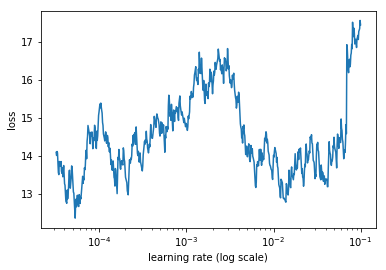

In [97]:
lr=1e-4
m.lr_find()
m.sched.plot(100)

In [98]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 1, [1000,500], [0.001,0.01], y_range=y_range)
lr = 1e-4

In [99]:
m.fit(lr, 3, metrics=[exp_rmse])

epoch      trn_loss   val_loss   exp_rmse                                                                              
    0      13.960068  15.702256  3.834567  
    1      14.143873  15.702225  3.834563                                                                              
    2      15.137038  15.702222  3.834563                                                                              



[array([15.70222]), 3.8345628598871024]

In [100]:
x,y=m.predict_with_targs()

In [101]:
exp_rmse(x,y)

3.9626030364012843

In [102]:
pred_test=m.predict(True)
pred_test = np.exp(pred_test)

In [103]:
df_test[dep]=pred_test

In [116]:
csv_fn=f'{PATH}/tmp/elo-subv5.csv'

In [105]:
# df_uniq = df_test.groupby('card_id').mean().reset_index()

In [106]:
# df_uniq.head()

In [117]:
df_test[['card_id',dep]].to_csv(csv_fn, index=False)

In [134]:
# df_uniq[['card_id',dep]].to_csv(csv_fn, index=False)

In [112]:
import lightgbm as lgb
((val, trn), (y_val, y_trn)) = split_by_idx(val_idx, df.values, y)
lgb_train = lgb.Dataset(trn, y_trn)
lgb_val = lgb.Dataset(val, y_val)

In [113]:
len(df.values)

201917

In [114]:
  params = {
        'objective': 'binary',
        'boosting': 'gbdt',
        'learning_rate': 0.2,
        'verbose': 0,
        'num_leaves': 100,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'num_rounds': 100,
        'metric': 'auc'
    }

In [115]:
lgbm_model = lgb.train(params, train_set=lgb_train, valid_sets=lgb_val, verbose_eval=5)
predictions = lgbm_model.predict(df_test1)
df_test[dep] =predictions

D:\python\envs\fastai\lib\site-packages\lightgbm\engine.py:116: UserWarning: Found `num_rounds` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[5]	valid_0's auc: 0.522751
[10]	valid_0's auc: 0.52287
[15]	valid_0's auc: 0.522058
[20]	valid_0's auc: 0.52123
[25]	valid_0's auc: 0.521381
[30]	valid_0's auc: 0.521111
[35]	valid_0's auc: 0.520675
[40]	valid_0's auc: 0.520527
[45]	valid_0's auc: 0.520119
[50]	valid_0's auc: 0.519585
[55]	valid_0's auc: 0.519242
[60]	valid_0's auc: 0.518838
[65]	valid_0's auc: 0.519182
[70]	valid_0's auc: 0.518439
[75]	valid_0's auc: 0.518909
[80]	valid_0's auc: 0.518352
[85]	valid_0's auc: 0.518408
[90]	valid_0's auc: 0.517631
[95]	valid_0's auc: 0.517528
[100]	valid_0's auc: 0.5174


#Random Forest

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
((val, trn), (y_val, y_trn)) = split_by_idx(val_idx, df.values, y)

In [137]:
m = RandomForestRegressor(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                               n_jobs=-1, oob_score=True)

In [138]:
m.fit(trn, y_trn)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.99, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [152]:
val.shape

(66703, 12)

In [151]:
len(val)

66703

In [153]:
preds = m.predict(df_test1.values)

In [154]:
len(preds)

158266

In [155]:
len(df_test)

158266

In [156]:
df_test[dep] = preds

In [157]:
df_uniq1 = df_test.groupby('card_id').count().reset_index()

In [158]:
len(df_uniq1)

123623

,card_id,feature_1,feature_2,feature_3,merchant_category_id,state_id,city_id,first_active_month,_weekday,_day,_month,_year,purchase_amount,target
0,C_ID_0001238066,1,1,1,1,1,1,1,1,1,1,1,1,1
1,C_ID_0001793786,1,1,1,1,1,1,1,1,1,1,1,1,1
2,C_ID_00024e244b,1,1,1,1,1,1,1,1,1,1,1,1,1
3,C_ID_0002709b5a,1,1,1,1,1,1,1,1,1,1,1,1,1
4,C_ID_000298032a,1,1,1,1,1,1,1,1,1,1,1,1,1


In [160]:
df_uniq1[['card_id',dep]].to_csv(csv_fn, index=False)